# Merging Dataframes

In [100]:
import pandas as pd

df = pd.DataFrame([
    {'Name': 'Chris', 'Item Purchased':'Sponge', 'Cost': 22.50},
    {'Name': 'Kevyn', 'Item Purchased':'Kitty Litter', 'Cost': 2.50},
    {'Name': 'Filip', 'Item Purchased':'Spoon', 'Cost': 5.00}
], index = ['Store 1', 'Store 1', 'Store 2'])

df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [3]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [7]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [11]:
staff_df = pd.DataFrame([
    {'Name':'Kelly', 'Role':'Director of HR'},
    {'Name':'Sally', 'Role':'Course liasion'},
    {'Name':'James', 'Role':'Grader'}
])

staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([
    {'Name':'James', 'School':'Business'},
    {'Name':'Mike', 'School':'Law'},
    {'Name':'Sally', 'School':'Engineering'}
])

student_df = student_df.set_index('Name')

print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [12]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [19]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Name_x,Role,Name_y,School
0,Kelly,Director of HR,James,Business
1,Sally,Course liasion,Mike,Law
2,James,Grader,Sally,Engineering


In [14]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [15]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [17]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [20]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [21]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])

student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

staff_df
student_df

pd.merge(staff_df, student_df, how='inner', left_on=['First Name', 'Last Name'], right_on=['First Name', 'Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [30]:
import pandas as pd

df = pd.read_csv('E:\Informacion\Documentos\GitHub\Introduction_DataScience_MichiganU\Weeks_Files\Resources\CSV_Files\census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [31]:
(df.where(df['SUMLEV'] == 50)
 .dropna()
 .set_index(['STNAME','CTYNAME'])
 .rename(columns={'ESTIMATESBASE2010':'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [32]:
df = df[df['SUMLEV'] == 50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010':'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [33]:
import numpy as np 

def min_max(row):
    data = row[[
        'POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015'
    ]]
    
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [34]:
df.apply(min_max, axis=1)

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

In [35]:
import numpy as np

def min_max(row):
    data = row[[
        'POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015',
    ]]
    
    row['min'] = np.min(data)
    row['max'] = np.max(data)
    return row

df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Barbour County           27457.0            27457.0          27341.0   
        Bibb County              22915.0            22919.0          22861.0   
        Blount County            57322.0            57322.0          57373.0   
...                                  ...                ...              ...   
Wyoming Sweetwater County        43806.0            43806.0          43593.0   
        Teton County             21294.0            21294.0          21297.0   
        Uinta County             21118.0            21118.0          21102.0   
        Washakie County           8533.0             8533.0           8545.0   
        Weston County             7208.0             7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County               -6.201001         -0.177537   
        Blount County             -1.748766         -2.062535   
...                                     ...               ...   
Wyoming Sweetwater County         -5.339774        -14.252889   
        Teton County              19.525929         14.143021   
        Uinta County              -6.902954        -14.215862   
        Washakie County           -2.013502        -17.781491   
        Weston County             12.372583          1.533635   

                           RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
STNAME  CTYNAME                                                         
Alabama Autauga County            -2.530799     7.606016    -2.626146   
        Baldwin County            17.197872    15.844176    18.559627   
        Barbour County           -10.543299    -4.87

In [36]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']

df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

# Group By

In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv('E:\Informacion\Documentos\GitHub\Introduction_DataScience_MichiganU\Weeks_Files\Resources\CSV_Files\census.csv')
df = df[df['SUMLEV'] == 50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [39]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME'] == state).dropna()['CENSUS2010POP'])
    print('Counties in State ' + state + ' have an average population of ' + str(avg))

Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an average population of 78581.1875
Counties in State Connecticut have an average population of 446762.125
Counties in State Delaware have an average population of 299311.3333333333
Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average populat

Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average population of 27172.55238095238
Counties in State Kentucky have an average population of 36161.39166666667
Counties in State Louisiana have an average population of 70833.9375
Counties in State Maine have an average population of 83022.5625
Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population of 467687.78571428574
Counties in State Michigan have an average population o

Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population of 467687.78571428574
Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 36186.54878048781
Counties in State Missouri have an average population of 52077.62608695652
Counties in State Montana have an average population of 17668.125
Counties in State Nebraska have an average population of 19638.075268817203
Counties in State Nevada have an average population of 158855.9411764706
Counties in State New Hampshire have an average population of 131647.0
Counties in State New Jersey have an average population of 418661.61904761905
Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolin

Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma have an average population of 48718.844155844155
Counties in State Oregon have an average population of 106418.72222222222
Counties in State Pennsylvania have an average population of 189587.74626865672
Counties in State Rhode Island have an average population of 210513.4
Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in St

Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Vermont have an average population of 44695.78571428572
Counties in State Virginia have an average population of 60111.29323308271
Counties in State Washington have an average population of 172424.10256410256
Counties in State West Virginia have an average population of 33690.8
Counties in State Wisconsin have an average population of 78985.91666666667
Counties in State Wyoming have an average population of 24505.478260869564
Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an 

Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an average population of 78581.1875
Counties in State Connecticut have an average population of 446762.125
Counties in State Delaware have an average population of 299311.3333333333
Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average popula

Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average population of 27172.55238095238
Counties in State Kentucky have an average population of 36161.39166666667
Counties in State Louisiana have an average population of 70833.9375
Counties in State Maine have an average population of 83022.5625
Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population of 467687.78571428574
Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 3

Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 36186.54878048781
Counties in State Missouri have an average population of 52077.62608695652
Counties in State Montana have an average population of 17668.125
Counties in State Nebraska have an average population of 19638.075268817203
Counties in State Nevada have an average population of 158855.9411764706
Counties in State New Hampshire have an average population of 131647.0
Counties in State New Jersey have an average population of 418661.61904761905
Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an avera

Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma have an average population of 48718.844155844155
Counties in State Oregon have an average population of 106418.72222222222
Counties in State Pennsylvania have an average population of 189587.74626865672
Counties in State Rhode Island have an average population of 210513.4
Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Ve

Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Vermont have an average population of 44695.78571428572
Counties in State Virginia have an average population of 60111.29323308271
Counties in State Washington have an average population of 172424.10256410256
Counties in State West Virginia have an average population of 33690.8
Counties in State Wisconsin have an average population of 78985.91666666667
Counties in State Wyoming have an average population of 24505.478260869564
Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an 

Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an average population of 78581.1875
Counties in State Connecticut have an average population of 446762.125
Counties in State Delaware have an average population of 299311.3333333333
Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average populatio

Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average population of 27172.55238095238
Counties in State Kentucky have an average population of 36161.39166666667
Counties in State Louisiana have an average population of 70833.9375
Counties in State Maine have an average population of 83022.5625
Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population of 467687.78571428574
Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 36186.54878048781
Counties in State Missouri have an average population of 52077.62608695652
Counties in State Montana have an average po

Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 36186.54878048781
Counties in State Missouri have an average population of 52077.62608695652
Counties in State Montana have an average population of 17668.125
Counties in State Nebraska have an average population of 19638.075268817203
Counties in State Nevada have an average population of 158855.9411764706
Counties in State New Hampshire have an average population of 131647.0
Counties in State New Jersey have an average population of 418661.61904761905
Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma hav

Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma have an average population of 48718.844155844155
Counties in State Oregon have an average population of 106418.72222222222
Counties in State Pennsylvania have an average population of 189587.74626865672
Counties in State Rhode Island have an average population of 210513.4
Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Ve

Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Vermont have an average population of 44695.78571428572
Counties in State Virginia have an average population of 60111.29323308271
Counties in State Washington have an average population of 172424.10256410256
Counties in State West Virginia have an average population of 33690.8
Counties in State Wisconsin have an average population of 78985.91666666667
Counties in State Wyoming have an average population of 24505.478260869564
Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an 

Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an average population of 78581.1875
Counties in State Connecticut have an average population of 446762.125
Counties in State Delaware have an average population of 299311.3333333333
Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average popula

Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average population of 27172.55238095238
Counties in State Kentucky have an average population of 36161.39166666667
Counties in State Louisiana have an average population of 70833.9375
Counties in State Maine have an average population of 83022.5625
Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population of 467687.78571428574
Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 3

Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma have an average population of 48718.844155844155
Counties in State Oregon have an average population of 106418.72222222222
Counties in State Pennsylvania have an average population of 189587.74626865672
Counties in State Rhode Island have an average population of 210513.4
Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in St

Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Vermont have an average population of 44695.78571428572
Counties in State Virginia have an average population of 60111.29323308271
Counties in State Washington have an average population of 172424.10256410256
Counties in State West Virginia have an average population of 33690.8
Counties in State Wisconsin have an average population of 78985.91666666667
Counties in State Wyoming have an average population of 24505.478260869564
Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizon

Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an average population of 78581.1875
Counties in State Connecticut have an average population of 446762.125
Counties in State Delaware have an average population of 299311.3333333333
Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average populat

Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average population of 27172.55238095238
Counties in State Kentucky have an average population of 36161.39166666667
Counties in State Louisiana have an average population of 70833.9375
Counties in State Maine have an average population of 83022.5625
Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population of 467687.78571428574
Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 3

Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 36186.54878048781
Counties in State Missouri have an average population of 52077.62608695652
Counties in State Montana have an average population of 17668.125
Counties in State Nebraska have an average population of 19638.075268817203
Counties in State Nevada have an average population of 158855.9411764706
Counties in State New Hampshire have an average population of 131647.0
Counties in State New Jersey have an average population of 418661.61904761905
Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma hav

Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma have an average population of 48718.844155844155
Counties in State Oregon have an average population of 106418.72222222222
Counties in State Pennsylvania have an average population of 189587.74626865672
Counties in State Rhode Island have an average population of 210513.4
Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Vermont have an average population of 44695.78571428572
Counties in State Virg

Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Vermont have an average population of 44695.78571428572
Counties in State Virginia have an average population of 60111.29323308271
Counties in State Washington have an average population of 172424.10256410256
Counties in State West Virginia have an average population of 33690.8
Counties in State Wisconsin have an average population of 78985.91666666667
Counties in State Wyoming have an average population of 24505.478260869564
Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an 

Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an average population of 78581.1875
Counties in State Connecticut have an average population of 446762.125
Counties in State Delaware have an average population of 299311.3333333333
Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average popula

Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average population of 27172.55238095238
Counties in State Kentucky have an average population of 36161.39166666667
Counties in State Louisiana have an average population of 70833.9375
Counties in State Maine have an average population of 83022.5625
Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population of 467687.78571428574
Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 3

Counties in State Michigan have an average population of 119080.0
Counties in State Minnesota have an average population of 60964.65517241379
Counties in State Mississippi have an average population of 36186.54878048781
Counties in State Missouri have an average population of 52077.62608695652
Counties in State Montana have an average population of 17668.125
Counties in State Nebraska have an average population of 19638.075268817203
Counties in State Nevada have an average population of 158855.9411764706
Counties in State New Hampshire have an average population of 131647.0
Counties in State New Jersey have an average population of 418661.61904761905
Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an avera

Counties in State New Mexico have an average population of 62399.36363636364
Counties in State New York have an average population of 312550.03225806454
Counties in State North Carolina have an average population of 95354.83
Counties in State North Dakota have an average population of 12690.396226415094
Counties in State Ohio have an average population of 131096.63636363635
Counties in State Oklahoma have an average population of 48718.844155844155
Counties in State Oregon have an average population of 106418.72222222222
Counties in State Pennsylvania have an average population of 189587.74626865672
Counties in State Rhode Island have an average population of 210513.4
Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in St

Counties in State South Carolina have an average population of 100551.39130434782
Counties in State South Dakota have an average population of 12336.060606060606
Counties in State Tennessee have an average population of 66801.1052631579
Counties in State Texas have an average population of 98998.27165354331
Counties in State Utah have an average population of 95306.37931034483
Counties in State Vermont have an average population of 44695.78571428572
Counties in State Virginia have an average population of 60111.29323308271
Counties in State Washington have an average population of 172424.10256410256
Counties in State West Virginia have an average population of 33690.8
Counties in State Wisconsin have an average population of 78985.91666666667
Counties in State Wyoming have an average population of 24505.478260869564
Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizon

Counties in State Wisconsin have an average population of 78985.91666666667
Counties in State Wyoming have an average population of 24505.478260869564
Counties in State Alabama have an average population of 71339.34328358209
Counties in State Alaska have an average population of 24490.724137931036
Counties in State Arizona have an average population of 426134.4666666667
Counties in State Arkansas have an average population of 38878.90666666667
Counties in State California have an average population of 642309.5862068966
Counties in State Colorado have an average population of 78581.1875
Counties in State Connecticut have an average population of 446762.125
Counties in State Delaware have an average population of 299311.3333333333
Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an av

Counties in State District of Columbia have an average population of 601723.0
Counties in State Florida have an average population of 280616.5671641791
Counties in State Georgia have an average population of 60928.63522012578
Counties in State Hawaii have an average population of 272060.2
Counties in State Idaho have an average population of 35626.86363636364
Counties in State Illinois have an average population of 125790.50980392157
Counties in State Indiana have an average population of 70476.10869565218
Counties in State Iowa have an average population of 30771.262626262625
Counties in State Kansas have an average population of 27172.55238095238
Counties in State Kentucky have an average population of 36161.39166666667
Counties in State Louisiana have an average population of 70833.9375
Counties in State Maine have an average population of 83022.5625
Counties in State Maryland have an average population of 240564.66666666666
Counties in State Massachusetts have an average population

In [40]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an aver

Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania hav

Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964

Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South C

Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alab

Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolin

Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an av

Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an aver

Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizon

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an 

Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizon

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population

Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an av

Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska hav

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [41]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [42]:
df = df.set_index('STNAME')

def fun(item):
    if item[0] < 'M':
        return 0
    if item[0] < 'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [43]:
df = pd.read_csv('E:\Informacion\Documentos\GitHub\Introduction_DataScience_MichiganU\Weeks_Files\Resources\CSV_Files\census.csv')
df = df[df['SUMLEV'] == 50]

In [44]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [45]:
print(type(df.groupby(level=0)['POPESTIMATE2010', 'POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


E:\Programas\Desarrollo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [59]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg([('avg', np.average), ('sum', np.sum)]))

E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [60]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']).agg([('avg', np.average),('sum', np.sum)])

E:\Programas\Desarrollo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


POPESTIMATE2010           POPESTIMATE2011          
                                 avg       sum             avg       sum
STNAME                                                                  
Alabama                 71420.313433   4785161    71658.328358   4801108
Alaska                  24621.413793    714021    24921.379310    722720
Arizona                427213.866667   6408208   431248.800000   6468732
Arkansas                38965.253333   2922394    39180.506667   2938538
California             643691.017241  37334079   650000.586207  37700034
Colorado                78878.968750   5048254    79991.875000   5119480
Connecticut            447464.625000   3579717   448719.875000   3589759
Delaware               299930.333333    899791   302638.666667    907916
District of Columbia   605126.000000    605126   620472.000000    620472
Florida                281341.641791  18849890   285157.208955  19105533
Georgia                 61090.905660   9713454    61712.452830   9812280
Hawaii                 272796.000000   1363980   275645.400000   1378227
Idaho                   35704.227273   1570986    36003.045455   1584134
Illinois               125894.598039  12841249   126096.882353  12861882
Indiana                 70549.891304   6490590    70835.271739   6516845
Iowa                    30815.090909   3050694    30963.525253   3065389
Kansas                  27226.895238   2858824    27332.542857   2869917
Kentucky                36232.808333   4347937    36399.016667   4367882
Louisiana               71014.859375   4544951    71490.328125   4575381
Maine                   82980.937500   1327695    83016.062500   1328257
Maryland               241183.708333   5788409   243507.125000   5844171
Massachusetts          468931.142857   6565036   472271.214286   6611797
Michigan               119004.445783   9877369   118995.048193   9876589
Minnesota               61044.862069   5310903    61472.632184   5348119
Mississippi             36223.365854   2970316    36317.060976   2977999
Missouri                52139.582609   5996052    52265.973913   6010587
Montana                 17690.053571    990643    17816.892857    997746
Nebraska                19677.688172   1830025    19810.569892   1842383
Nevada                 159025.882353   2703440   159930.529412   2718819
New Hampshire          131670.800000   1316708   131834.400000   1318344
New Jersey             419232.428571   8803881   421092.095238   8842934
New Mexico              62567.909091   2064741    62976.545455   2078226
New York               312950.322581  19402920   314890.354839  19523202
North Carolina          95589.790000   9558979    96510.250000   9651025
North Dakota            12726.981132    674530    12930.679245    685326
Ohio                   131145.068182  11540766   131198.204545  11545442
Oklahoma                48825.922078   3759596    49176.961039   3786626
Oregon                 106610.333333   3837972   107458.583333   3868509
Pennsylvania           189731.552239  12712014   190226.895522  12745202
Rhode Island           210643.800000   1053219   210371.200000   1051856
South Carolina         100780.304348   4635894   101581.152174   4672733
South Dakota            12368.166667    816299    12489.227273    824289
Tennessee               66911.421053   6356585    67351.663158   6398408
Texas                   99387.255906  25244363   101001.826772  25654464
Utah                    95704.344828   2775426    97118.620690   2816440
Vermont                 44713.142857    625984    44763.357143    626687
Virginia                60344.263158   8025787    60983.330827   8110783
Washington             172898.974359   6743060   174954.589744   6823229
West Virginia           33713.181818   1854225    33726.327273   1854948
Wisconsin               79030.611111   5690204    79301.666667   5709720
Wyoming                 24544.173913    564516    24685.565217    567768

In [61]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg([('POPESTIMATE2010', np.average),('POPESTIMATE2011', np.sum)]))

E:\Programas\Desarrollo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


POPESTIMATE2010                 POPESTIMATE2011  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433         4785161    71658.328358   
Alaska                  24621.413793          714021    24921.379310   
Arizona                427213.866667         6408208   431248.800000   
Arkansas                38965.253333         2922394    39180.506667   
California             643691.017241        37334079   650000.586207   
Colorado                78878.968750         5048254    79991.875000   
Connecticut            447464.625000         3579717   448719.875000   
Delaware               299930.333333          899791   302638.666667   
District of Columbia   605126.000000          605126   620472.000000   
Florida                281341.641791        18849890   285157.208955   
Georgia                 61090.905660         9713454    61712.452830   
Hawaii                 272796.000000         1363980   275645.400000   
Idaho                   35704.227273         1570986    36003.045455   
Illinois               125894.598039        12841249   126096.882353   
Indiana                 70549.891304         6490590    70835.271739   
Iowa                    30815.090909         3050694    30963.525253   
Kansas                  27226.895238         2858824    27332.542857   
Kentucky                36232.808333         4347937    36399.016667   
Louisiana               71014.859375         4544951    71490.328125   
Maine                   82980.937500         1327695    83016.062500   
Maryland               241183.708333         5788409   243507.125000   
Massachusetts          468931.142857         6565036   472271.214286   
Michigan               119004.445783         9877369   118995.048193   
Minnesota               61044.862069         5310903    61472.632184   
Mississippi             36223.365854         2970316    36317.060976   
Missouri                52139.582609         5996052    52265.973913   
Montana                 17690.053571          990643    17816.892857   
Nebraska                19677.688172         1830025    19810.569892   
Nevada                 159025.882353         2703440   159930.529412   
New Hampshire          131670.800000         1316708   131834.400000   
New Jersey             419232.428571         8803881   421092.095238   
New Mexico              62567.909091         2064741    62976.545455   
New York               312950.322581        19402920   314890.354839   
North Carolina          95589.790000         9558979    96510.250000   
North Dakota            12726.981132          674530    12930.679245   
Ohio                   131145.068182        11540766   131198.204545   
Oklahoma                48825.922078         3759596    49176.961039   
Oregon                 106610.333333         3837972   107458.583333   
Pennsylvania           189731.552239        12712014   190226.895522   
Rhode Island           210643.800000         1053219   210371.200000   
South Carolina         100780.304348         4635894   101581.152174   
South Dakota            12368.166667          816299    12489.227273   
Tennessee               66911.421053         6356585    67351.663158   
Texas                   99387.255906        25244363   101001.826772   
Utah                    95704.344828         2775426    97118.620690   
Vermont                 44713.142857          625984    44763.357143   
Virginia                60344.263158         8025787    60983.330827   
Washington             172898.974359         6743060   174954.589744   
West Virginia           33713.181818         1854225    33726.327273   
Wisconsin               79030.611111         5690204    79301.666667   
Wyoming                 24544.173913          564516    24685.565217   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama        

# Scales

In [62]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index = ['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])

df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [63]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [71]:
from pandas.api.types import CategoricalDtype

cats =['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']
category_type = CategoricalDtype(categories=cats, ordered=True)
grades = df['Grades'].astype(category_type)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [72]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [79]:
df = pd.read_csv('E:\Informacion\Documentos\GitHub\Introduction_DataScience_MichiganU\Weeks_Files\Resources\CSV_Files\census.csv')
df = df[df['SUMLEV'] == 50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg([('avg', np.average)])
pd.cut(df['avg'], 10)

E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
E:\Programas\Desarrollo\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [80]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('E:\Informacion\Documentos\GitHub\Introduction_DataScience_MichiganU\Weeks_Files\Resources\CSV_Files\cars.csv')

In [81]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [82]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [83]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [84]:
import pandas as pd
import numpy as np

### Timestamp

In [85]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [88]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [89]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [90]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [91]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [92]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [93]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datatime

In [95]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,63,12
"Aug 29, 2014",41,37
2015-06-26,48,81
7/12/16,64,29


In [96]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,63,12
2014-08-29,41,37
2015-06-26,48,81
2016-07-12,64,29


In [97]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [98]:
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [99]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a DataFrame

In [101]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [102]:
df = pd.DataFrame({'Count 1':100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2':120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,101,116
2016-10-16,107,123
2016-10-30,102,121
2016-11-13,108,129
2016-11-27,104,121
2016-12-11,109,121
2016-12-25,111,126
2017-01-08,120,115
2017-01-22,117,123


In [104]:
df.index.weekday_name

AttributeError: 'DataFrame' object has no attribute 'weekday_name'

In [105]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,6.0,7.0
2016-10-30,-5.0,-2.0
2016-11-13,6.0,8.0
2016-11-27,-4.0,-8.0
2016-12-11,5.0,0.0
2016-12-25,2.0,5.0
2017-01-08,9.0,-11.0
2017-01-22,-3.0,8.0


In [107]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,103.333333,120.0
2016-11-30,106.000000,125.0
2016-12-31,110.000000,123.5
2017-01-31,118.500000,119.0


In [108]:
df['2017']

,Count 1,Count 2
2017-01-08,120,115
2017-01-22,117,123


In [109]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,111,126


In [110]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,111,126
2017-01-08,120,115
2017-01-22,117,123


In [111]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,101,116
2016-10-09,101,116
2016-10-16,107,123
2016-10-23,107,123
2016-10-30,102,121
2016-11-06,102,121
2016-11-13,108,129
2016-11-20,108,129
2016-11-27,104,121
2016-12-04,104,121


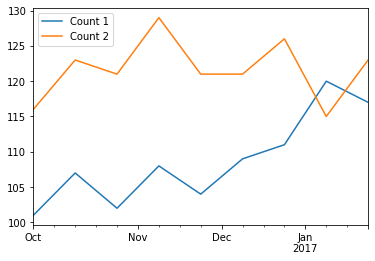

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()